# SI 370: Contingency tables, crosstabs, mosaic plots and chi-squared

In [19]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [4]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


In [7]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


In [8]:
import seaborn as sns

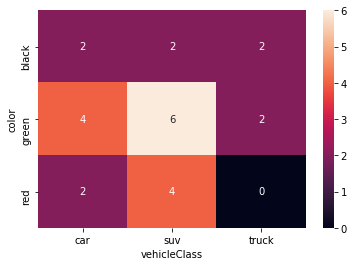

In [9]:
sns.heatmap(ct,annot=True)

In [10]:
titanic = pd.read_csv('data/titanic.csv')

In [11]:
ct = pd.crosstab(titanic.passtype,titanic.status)

Generate this:

![](resources/samplect.png)

In [13]:
## Let's first add a "totals" column
ctExt = ct.copy()  # make a copy for backup
ctExt.sum(axis=1)  # calculate row-wise sum

passtype
crew      885
first     325
second    285
third     706
dtype: int64

In [14]:
# add the column
ctExt['total'] = ctExt.sum(axis=1)

In [15]:
ctExt

status,alive,dead,total
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706


In [16]:
# calculate columnwise sum
s = ctExt.sum(axis=0)
#s
# add a row
ctExt.loc['total']=s 

In [17]:
ctExt
#ctExt.alive/ctExt.total

status,alive,dead,total
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
total,711,1490,2201


In [20]:
# calculate percents for each column
alivePercent = np.round(ctExt.alive/ctExt.total * 100,decimals=2)
deadPercent = np.round(ctExt.dead/ctExt.total * 100,decimals=2)
totalPercent = np.round(ctExt.total/ctExt.total * 100,decimals=2)

In [21]:
# pretty print
detailCT = ctExt.copy()
detailCT.alive = ctExt.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailCT.dead = ctExt.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailCT.total = ctExt.total.astype('str') + " (" + totalPercent.astype('str') + "%)" 

In [22]:
detailCT

status,alive,dead,total
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
total,711 (32.3%),1490 (67.7%),2201 (100.0%)


Group question: Is this what we would have expected?

In [23]:
# fill in the correct numbers on the next two lines
expectedAlive = ctExt.total * .32
expectedDead = ctExt.total * .68

In [24]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['total'] = ctExpected.sum(axis=1)
ctExpected.loc['total'] = ctExpected.sum(axis=0)
alivePercent = np.round(ctExpected.alive/ctExpected.total * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.total * 100,decimals=2)
totalPercent = np.round(ctExpected.total/ctExpected.total * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.total = ctExpected.total.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [25]:
detailExp

status,alive,dead,total
passtype,,,
crew,283.2 (32.0%),601.8000000000001 (68.0%),885.0 (100.0%)
first,104.0 (32.0%),221.00000000000003 (68.0%),325.0 (100.0%)
second,91.2 (32.0%),193.8 (68.0%),285.0 (100.0%)
third,225.92000000000002 (32.0%),480.08000000000004 (68.0%),706.0 (100.0%)
total,704.3199999999999 (32.0%),1496.6800000000003 (68.0%),2201.0 (100.0%)


In [26]:
detailCT

status,alive,dead,total
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
total,711 (32.3%),1490 (67.7%),2201 (100.0%)


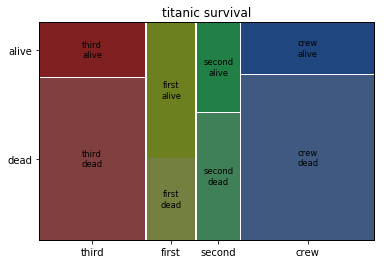

In [31]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

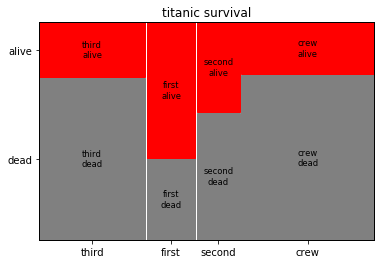

In [32]:
# slightly easier ot read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

In [33]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.4011036168333
p-val =  4.999927529867932e-41
degree of freedom =  3
Expected:


,0,1
0,285.885961,599.114039
1,104.986370,220.013630
2,92.064970,192.935030
3,228.062699,477.937301
